Visualize any existing relationship between age and reported injuries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [28]:
mainData=pd.read_csv("C:\\Users\\rober\\Downloads\\IndeedBIHomework (1) (1) (1) (1) (1) (1) (2)\\BIHomework\\NEISS2014.csv")
bodyParts=pd.read_csv("C:\\Users\\rober\\\Downloads\\IndeedBIHomework (1) (1) (1) (1) (1) (1) (2)\\BIHomework\\BodyParts.csv")

In [29]:
combined=pd.merge(mainData,bodyParts, how="left", left_on="body_part",right_on="Code")

In [7]:
#correct solution may be to create range buckets for each age grouping??

In [30]:
ageRange = [0,3,12,20,65,110] # age ranges. 0-3 is a baby, 3-12 is a child etc

In [31]:
ageGroups = ['Baby', 'Child', 'Teenager', 'Adults','OAP'] #different age catergories to use

In [34]:
ageGrouping = pd.cut(combined['age'], ageRange, labels=ageGroups)

In [35]:
ageGrouping

0          Adults
1          Adults
2          Adults
3          Adults
4        Teenager
5          Adults
6             OAP
7             OAP
8             OAP
9             OAP
10          Child
11            OAP
12            OAP
13         Adults
14       Teenager
15         Adults
16       Teenager
17         Adults
18         Adults
19         Adults
20          Child
21          Child
22         Adults
23            OAP
24         Adults
25         Adults
26            OAP
27         Adults
28       Teenager
29         Adults
           ...   
65469      Adults
65470         OAP
65471      Adults
65472         OAP
65473       Child
65474       Child
65475      Adults
65476         OAP
65477      Adults
65478       Child
65479         NaN
65480    Teenager
65481      Adults
65482    Teenager
65483    Teenager
65484      Adults
65485         OAP
65486    Teenager
65487      Adults
65488      Adults
65489       Child
65490      Adults
65491         NaN
65492         OAP
65493     

In [36]:
combined['age group'] = pd.cut(combined['age'], ageRange, labels=ageGroups)

In [37]:
combined

,CPSC Case #,trmt_date,psu,weight,stratum,age,sex,race,race_other,diag,...,body_part,disposition,location,fmv,prod1,prod2,narrative,BodyPart,Code,age group
0,141200216,10/23/14,63,99.7040,M,21,Female,None listed,NaN,62,...,75,1,1,0,679,1807.0,21YOF LAYING ON THE COUCH AND ROLLED OFF TO TH...,Head,75,Adults
1,140117851,1/4/14,63,81.5760,M,62,Female,White,NaN,57,...,79,1,1,0,1807,115.0,62YOF TRIPPED OVER THE CORD FOR THE VACUUM CLE...,"Trunk, lower",79,Adults
2,150144993,8/17/14,63,99.7040,M,21,Female,None listed,NaN,57,...,83,1,0,0,1333,NaN,21YOF FELL OFF A SKATEBOARD AND FRACTURED FOOT,Foot,83,Adults
3,150230176,7/27/14,63,99.7040,M,30,Female,None listed,NaN,64,...,79,1,1,0,4076,NaN,30YOF TRYING TO GET OUT OF BED AND FELT A POP ...,"Trunk, lower",79,Adults
4,141220717,9/8/14,63,99.7040,M,16,Male,None listed,NaN,57,...,82,1,0,0,1893,NaN,16YOM HAD HAND SLAMMED IN A DOOR FRACTURED HAND,Hand,82,Teenager
5,150151229,8/12/14,63,99.7040,M,22,Male,None listed,NaN,64,...,79,1,1,0,1871,NaN,22YOM HELPING FATHER PUT UP A FENCE AND STRAIN...,"Trunk, lower",79,Adults
6,150216968,7/15/14,63,99.7040,M,92,Male,None listed,NaN,72,...,36,1,1,0,214,NaN,92YOM BUMPED LOWER LEG ON A DISHWASHER DOOR SU...,"Leg, lower",36,OAP
7,141200989,11/24/14,63,112.1671,M,89,Male,None listed,NaN,57,...,79,4,1,0,4074,NaN,89YOM GETTING OUT OF A CHAIR AND FELL ONTO HIP...,"Trunk, lower",79,OAP
8,141241629,12/11/14,63,99.7040,M,75,Female,None listed,NaN,59,...,75,1,1,0,3251,NaN,75YOF GETTING INTO A BUILT IN GROUND SWIMMING ...,Head,75,OAP
9,150226548,7/14/14,63,99.7040,M,68,Male,None listed,NaN,64,...,35,1,4,0,5040,NaN,68YOM RIDING HIS BICYCLE AND STRAINED KNEE,Knee,35,OAP


In [101]:
groupedAge=combined.groupby(['age group','BodyPart'])['BodyPart'].agg(['count']).reset_index()


In [102]:
groupedAge

,age group,BodyPart,count
0,Baby,>50% of body,266
1,Baby,Ankle,37
2,Baby,"Arm, lower",125
3,Baby,"Arm, upper",45
4,Baby,Ear,88
5,Baby,Elbow,166
6,Baby,Eyeball,44
7,Baby,Face,941
8,Baby,Finger,230
9,Baby,Foot,133


In [99]:
sortbyAgeGroup=groupedAge.sort_values(['age group','count'],ascending=[True,False]).reset_index(drop=True)

In [100]:
sortbyAgeGroup

,age group,BodyPart,count
0,Baby,Face,941
1,Baby,Head,853
2,Baby,>50% of body,266
3,Baby,Mouth,263
4,Baby,Finger,230
5,Baby,Elbow,166
6,Baby,Internal,148
7,Baby,Foot,133
8,Baby,"Arm, lower",125
9,Baby,"Leg, lower",121


In [105]:
aggByGroup=sortbyAgeGroup.groupby(['age group'])['age group','count'].agg(['sum']).reset_index()

In [106]:
aggByGroup

,age group,count
,,sum
0,Baby,3894
1,Child,12480
2,Teenager,10456
3,Adults,25924
4,OAP,9138


In [56]:
%matplotlib inline

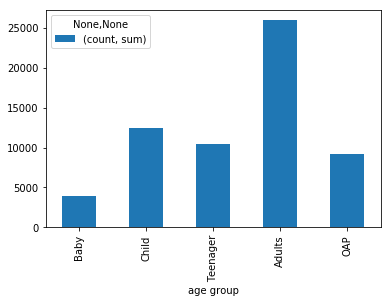

In [73]:
aggByGroup.plot.bar(x='age group')

In [74]:
aggByGroup

,age group,count
,,sum
0,Baby,3894
1,Child,12480
2,Teenager,10456
3,Adults,25924
4,OAP,9138


In [75]:
#can try to group by type also into stacked bar chart or some sort of combined bar

In [108]:
aggByGroup

,age group,count
,,sum
0,Baby,3894
1,Child,12480
2,Teenager,10456
3,Adults,25924
4,OAP,9138


In [109]:
aggByGroup.columns=aggByGroup.columns.droplevel(1)

In [110]:
aggByGroup

,age group,count
0,Baby,3894
1,Child,12480
2,Teenager,10456
3,Adults,25924
4,OAP,9138


In [113]:
aggByGroup

,age group,count
0,Baby,3894
1,Child,12480
2,Teenager,10456
3,Adults,25924
4,OAP,9138


In [114]:
sortbyAgeGroup

,age group,BodyPart,count
0,Baby,Face,941
1,Baby,Head,853
2,Baby,>50% of body,266
3,Baby,Mouth,263
4,Baby,Finger,230
5,Baby,Elbow,166
6,Baby,Internal,148
7,Baby,Foot,133
8,Baby,"Arm, lower",125
9,Baby,"Leg, lower",121


In [116]:
sortbyAgeGroup=pd.merge(sortbyAgeGroup,aggByGroup,how="left", on="age group")

In [117]:
sortbyAgeGroup

,age group,BodyPart,count_x,count_y,count
0,Baby,Face,941,3894,3894
1,Baby,Head,853,3894,3894
2,Baby,>50% of body,266,3894,3894
3,Baby,Mouth,263,3894,3894
4,Baby,Finger,230,3894,3894
5,Baby,Elbow,166,3894,3894
6,Baby,Internal,148,3894,3894
7,Baby,Foot,133,3894,3894
8,Baby,"Arm, lower",125,3894,3894
9,Baby,"Leg, lower",121,3894,3894


In [118]:
sortbyAgeGroup.drop('count', axis=1, inplace=True)

In [121]:
sortbyAgeGroup['rate %']=sortbyAgeGroup['count_x']/sortbyAgeGroup['count_y']*100

In [125]:
sortbyAgeGroup = sortbyAgeGroup.rename(columns={'count_x':'bodyPartCount'})

In [126]:
sortbyAgeGroup = sortbyAgeGroup.rename(columns={'count_y':'total'})

In [142]:
sortbyAgeGroup.head()

,age group,BodyPart,bodyPartCount,total,rate %
0,Baby,Face,941,3894,24.165383
1,Baby,Head,853,3894,21.905496
2,Baby,>50% of body,266,3894,6.831022
3,Baby,Mouth,263,3894,6.753980
4,Baby,Finger,230,3894,5.906523


In [143]:
import seaborn as sb

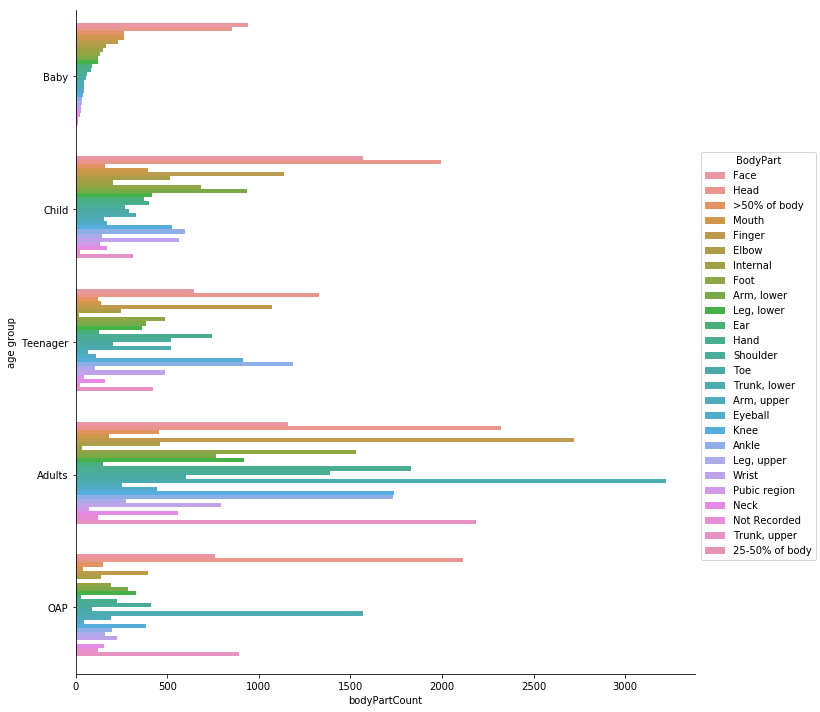

In [163]:
graph =sb.factorplot(x="bodyPartCount",y="age group",hue="BodyPart",data=sortbyAgeGroup,aspect=1,kind="bar",legend=True, size=10, orient='h') 